In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import os

In [2]:
df = pd.read_csv('../Merged_Fundamentals_and_Polls/merged_df_final.csv', index_col=0)

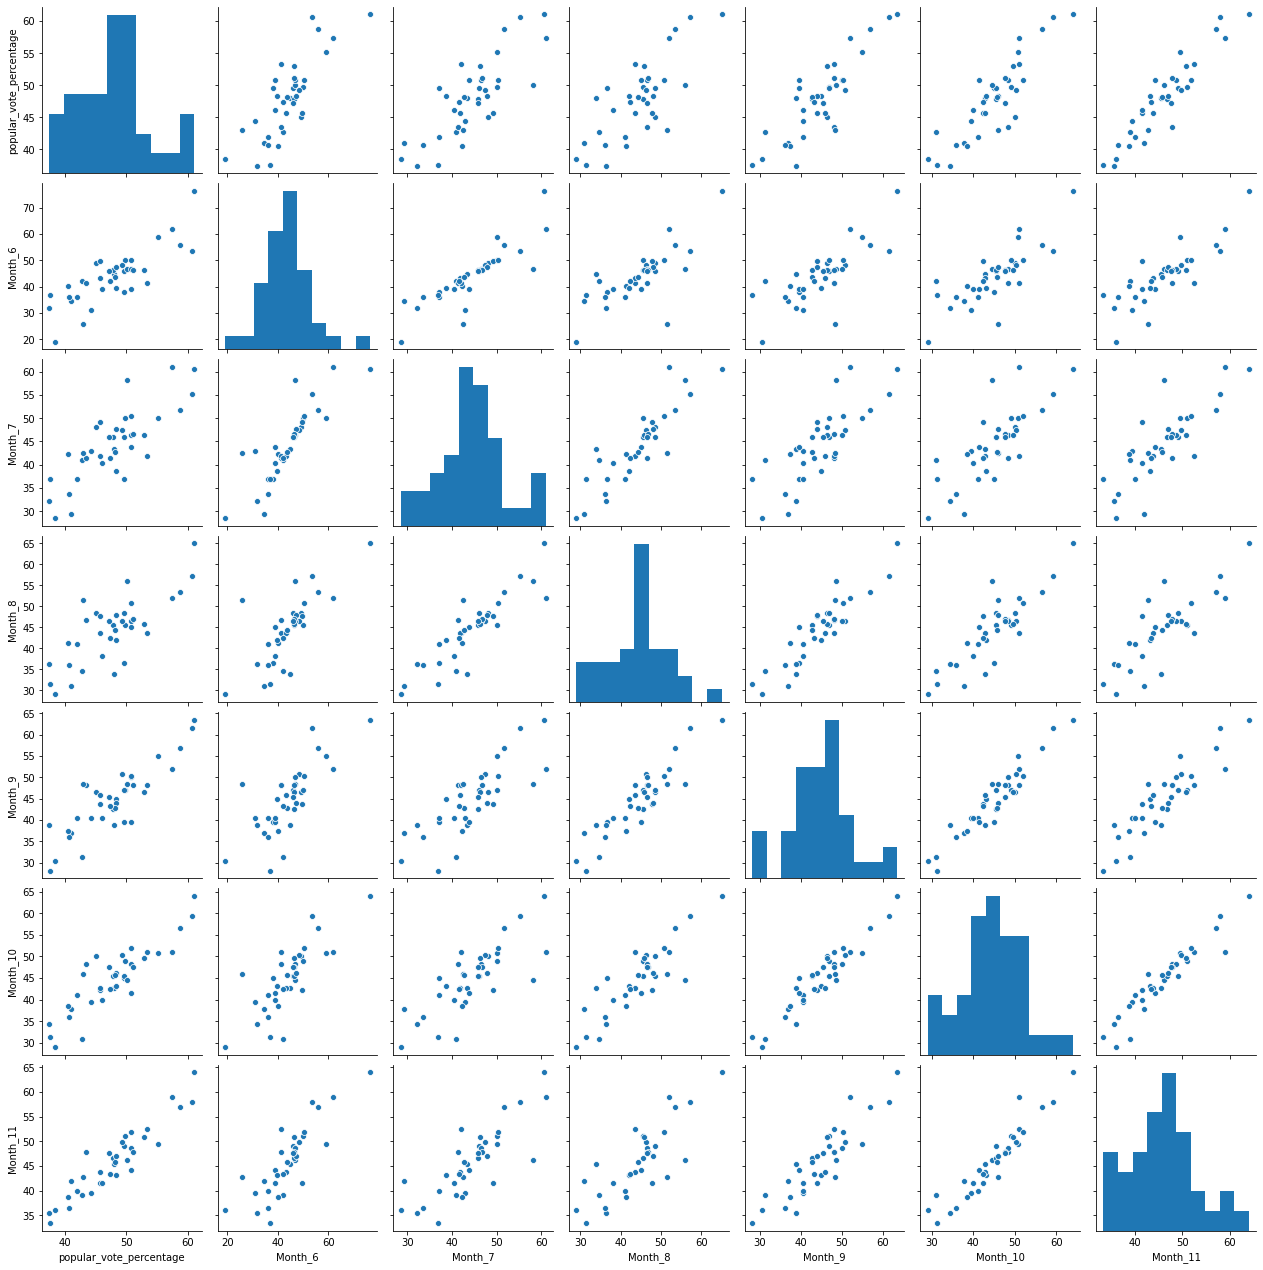

In [3]:
sns.pairplot(df[['popular_vote_percentage', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11']])

In [4]:
df.at[2, 'Month_8'] = 52.5
df.at[3, 'Month_8'] = 41.75
df.at[0, 'Month_11'] = 48
df.at[1, 'Month_11'] = 52
df['NAP'] = 1*(df['NAP06']) + 2*(df['NAP07']) + 3*(df['NAP08']) + 4*(df['NAP09']) + 5*(df['NAP10'])
df.drop(['NAP06', 'NAP07', 'NAP08', 'NAP09', 'NAP10'], axis=1, inplace=True)
df['payroll'] = 1*(df['payroll_y1']) + 2*(df['payroll_y2']) + 3*(df['payroll_y3']) + 4*(df['payroll_ey1']) + 5*(df['payroll_ey2']) + 6*(df['payroll_ey3'])
df.drop(['payroll_y1', 'payroll_y2', 'payroll_y3', 'payroll_ey1', 'payroll_ey2', 'payroll_ey3'], axis=1, inplace=True)
df['stock'] = 1*(df['Stock_y1']) + 2*(df['Stock_y2']) + 3*(df['Stock_y3']) + 4*df['Stock_ey']
df.drop(['Stock_y1', 'Stock_y2','Stock_y3','Stock_ey'], axis=1, inplace=True)
df['rdi'] = 1*(df['rdi_y0']) + 2*df['rdi_y1'] + 3*(df['rdi_y2']) + 4*(df['rdi_ey'])
df.drop(['rdi_y1', 'rdi_y2', 'rdi_y0', 'rdi_ey'], axis=1, inplace=True)
df['election'] = 1*(df['Electiony1']) + 2*df['Electiony2'] + 3*(df['Electiony3']) + 4*(df['Electiony4'])
df.drop(['Electiony1', 'Electiony2', 'Electiony3', 'Electiony4'], axis=1, inplace=True)
df['national_polls'] = 1*(df['Month_6']) + 2*df['Month_7']+ 3*(df['Month_8']) + 4*(df['Month_9']) + 5*(df['Month_10']) + 6*(df['Month_11'])
df.drop(['Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11'], axis=1, inplace=True)
df['gdp'] = 1*(df['Year0']) + 2*df['Year1'] + 3*(df['Year2'])
df.drop(['Year0', 'Year1', 'Year2'], axis=1, inplace=True)
df.drop(['President_winning'], axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop(['Year', 'Date'], axis=1, inplace=True)
df.drop('El_winner', axis=1, inplace=True)
df.drop('Early_Stopping_Previous', axis=1, inplace=True)
df.drop('popular_votes', axis=1, inplace=True)
df['state_election'] = -1*df['2nd_Mandate_Prev_Pres'] + 1*df['Current_President_Seeking_Reelection']
df.drop(['2nd_Mandate_Prev_Pres', 'Current_President_Seeking_Reelection'], axis=1, inplace=True)
df.drop('Winner', axis=1, inplace=True)
order= list(df.columns)[1:] + [list(df.columns)[0]]
print(order)
df = df[order]
df

['popular_vote_percentage', 'NAP', 'payroll', 'stock', 'rdi', 'election', 'national_polls', 'gdp', 'state_election', 'Democrat_Republican']


,popular_vote_percentage,NAP,payroll,stock,rdi,election,national_polls,gdp,state_election,Democrat_Republican
0,49.55,9.32,936671,0.0854,5.6,21264.635,892.500000,12542.043,0.0,1
1,45.07,9.32,936671,0.0854,5.6,21264.635,1038.500000,12542.043,0.0,0
2,55.18,4.71,1020250,1.2493,43.4,25920.281,1086.835000,14409.903,-1.0,0
3,44.33,4.71,1020250,1.2493,43.4,25920.281,837.915000,14409.903,-1.0,1
4,57.37,11.00,1092617,1.5554,46.9,29426.822,1157.000000,16877.643,1.0,0
5,41.97,11.00,1092617,1.5554,46.9,29426.822,840.000000,16877.643,1.0,1
6,49.72,8.68,1128882,0.6699,28.2,32542.056,1025.500000,18721.174,-1.0,1
7,49.55,8.68,1128882,0.6699,28.2,32542.056,993.000000,18721.174,-1.0,0
8,61.05,10.13,1220202,1.0637,53.1,39365.661,1350.500000,21927.910,1.0,1
9,38.47,10.13,1220202,1.0637,53.1,39365.661,646.000000,21927.910,1.0,0


In [5]:
df.drop(['election', 'payroll'], axis=1, inplace=True)

In [6]:
df

,popular_vote_percentage,NAP,stock,rdi,national_polls,gdp,state_election,Democrat_Republican
0,49.55,9.32,0.0854,5.6,892.500000,12542.043,0.0,1
1,45.07,9.32,0.0854,5.6,1038.500000,12542.043,0.0,0
2,55.18,4.71,1.2493,43.4,1086.835000,14409.903,-1.0,0
3,44.33,4.71,1.2493,43.4,837.915000,14409.903,-1.0,1
4,57.37,11.00,1.5554,46.9,1157.000000,16877.643,1.0,0
5,41.97,11.00,1.5554,46.9,840.000000,16877.643,1.0,1
6,49.72,8.68,0.6699,28.2,1025.500000,18721.174,-1.0,1
7,49.55,8.68,0.6699,28.2,993.000000,18721.174,-1.0,0
8,61.05,10.13,1.0637,53.1,1350.500000,21927.910,1.0,1
9,38.47,10.13,1.0637,53.1,646.000000,21927.910,1.0,0


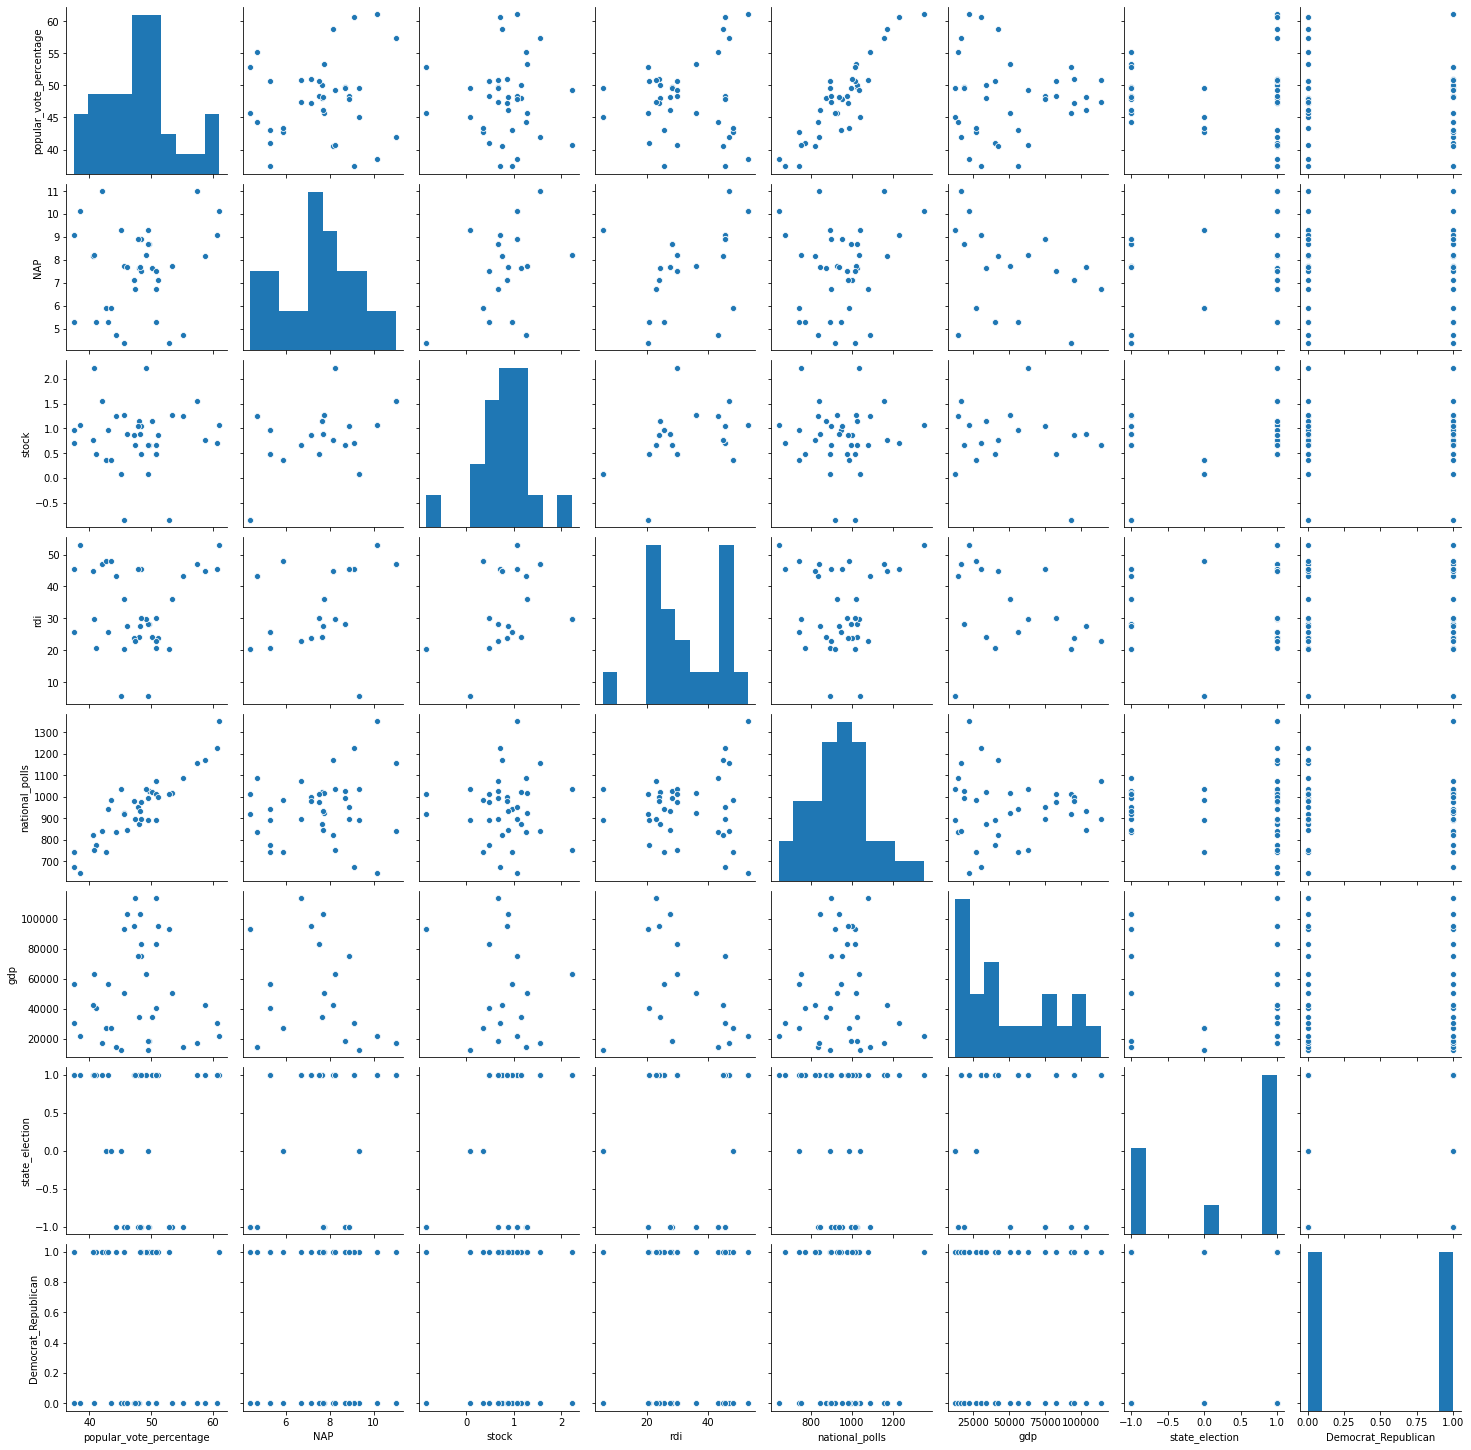

In [7]:
sns.pairplot(df)

In [9]:
df.shape

(38, 8)

In [8]:
print(os.getcwd())

C:\Users\David\Harvard\Harvard_projects\cs109a\Harvard_G1\data\EDA


In [ ]:
df.to_csv('../data/Merged_Fundamentals_and_Polls/df_6_predictors.csv')